<a href="https://colab.research.google.com/github/xslittlemaggie/Deep-Learning-Projects/blob/master/integer_addition_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integers addition

In [1]:
import numpy as np
from keras import Sequential
from keras.layers import LSTM, Dense
from sklearn.utils import shuffle
from random import randint

from keras.callbacks import ModelCheckpoint
from keras.models import save_model, load_model
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Model Building

In [2]:
model = Sequential()
model.add(LSTM(40,input_shape = (None, 1), return_sequences=True))
model.add(LSTM(20, return_sequences=False))
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam')

filepath = "weights-best.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='loss',mode='min' ,save_best_only='True')

callback_lists=[checkpoint]

model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 40)          6720      
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                4880      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 11,621
Trainable params: 11,621
Non-trainable params: 0
_________________________________________________________________


## Data Generation

In [8]:
dic = {str(i):i for i in range(10)}
dic['+'] = 11
dic

"11 + 32"

{'+': 11,
 '0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [19]:
"11 + 32", 43
"13 + 32"

'11 + 32'

In [20]:
def encode(input_str):
  return [[dic[s]] for s in input_str]

encode('12+12'), 24

[[1], [2], [11], [1], [2]]

In [0]:
def train_generator():
    while True:
        i = randint(0,99)
        j = randint(0,99)
        x_train = np.array([encode(str(i)+'+'+str(j))])
        y_train = [i+j]
        yield x_train, y_train

In [18]:
gen = train_generator()
print(next(gen))
print()
print(next(gen))

(array([[[ 9],
        [ 2],
        [11],
        [ 7]]]), [99])

(array([[[ 8],
        [ 4],
        [11],
        [ 2],
        [ 6]]]), [110])


## Training

In [7]:
history = model.fit(train_generator(), steps_per_epoch=1000, 
          epochs=50, 
          verbose=1,
         callbacks=callback_lists)

Epoch 1/50
1000/1000 [==============================] - 7s 7ms/step - loss: 1199.8847
Epoch 2/50
1000/1000 [==============================] - 7s 7ms/step - loss: 822.0779
Epoch 3/50
1000/1000 [==============================] - 7s 7ms/step - loss: 598.9914
Epoch 4/50
1000/1000 [==============================] - 7s 7ms/step - loss: 418.7307
Epoch 5/50
1000/1000 [==============================] - 7s 7ms/step - loss: 297.2965
Epoch 6/50
1000/1000 [==============================] - 7s 7ms/step - loss: 192.2123
Epoch 7/50
1000/1000 [==============================] - 7s 7ms/step - loss: 146.3340
Epoch 8/50
1000/1000 [==============================] - 7s 7ms/step - loss: 78.7298
Epoch 9/50
1000/1000 [==============================] - 7s 7ms/step - loss: 71.8140
Epoch 10/50
1000/1000 [==============================] - 7s 7ms/step - loss: 45.7480
Epoch 11/50
1000/1000 [==============================] - 8s 8ms/step - loss: 34.3604
Epoch 12/50
1000/1000 [==============================] - 7s 7ms/st

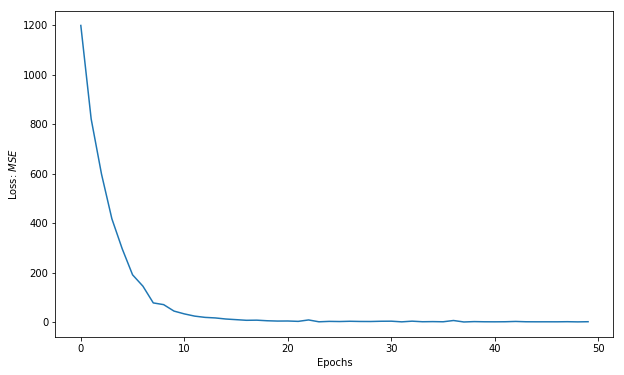

In [14]:
plt.figure(figsize = (10, 6))
plt.plot(history.history["loss"])
plt.ylabel("Loss: $MSE$")
plt.xlabel("Epochs")
plt.show()

## Testing

In [15]:
model = load_model('weights-best.hdf5')
print(model.predict(np.array([encode('3+17')])))
print(model.predict(np.array([encode('39+46')])))
print(model.predict(np.array([encode('64+25')])))

[[20.447134]]
[[83.93134]]
[[88.05633]]


In [16]:
print(model.predict(np.array([encode('125+234')])))

[[121.306145]]
